In [2]:
import ipywidgets as widgets
import datetime as dt
import pandas as pd
import numpy as np
import zarr
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]


In [2]:
his_url = "https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/zunormm/ZUNO_his.zarr/"
his = xr.open_zarr(his_url, consolidated=True)
#his

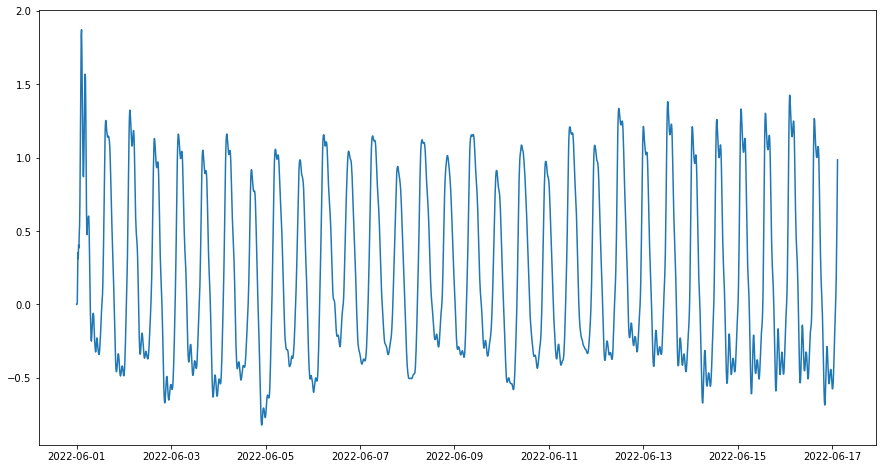

In [3]:
iloc=0
plt.plot(his.time[:],his.waterlevel[:,iloc])

## Map files

In [3]:
#map_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/zunormm/ZUNO_map.zarr/"
map_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/zunormm_dischargeScenario/ZUNO_highQ_map_3d.zarr"
#map_url="../Particles.jl/ZUNO_map.zarr"
map=xr.open_zarr(map_url,consolidated=True)
#map
map.dims

KeyError: '.zmetadata'

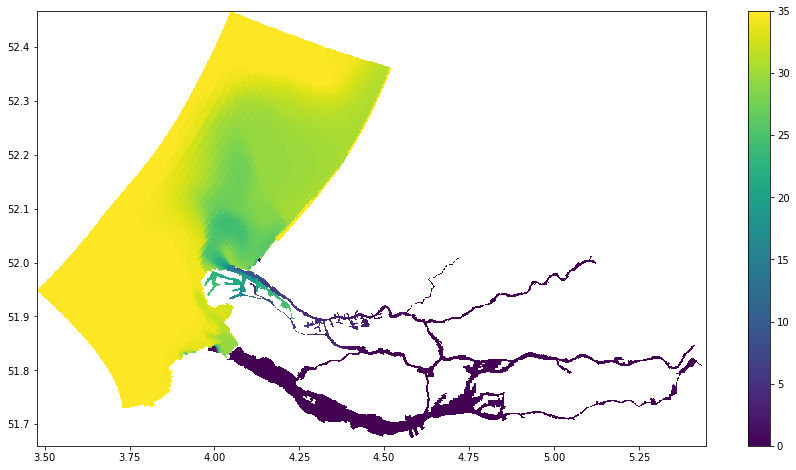

In [13]:
ilayer=44
itime=90
x=map.x_center[:]
y=map.y_center[:]
z=map.z_center[:]
sal_slice=map.salinity[itime,ilayer,:,:]


plt.pcolormesh(x,y,sal_slice)
plt.colorbar()


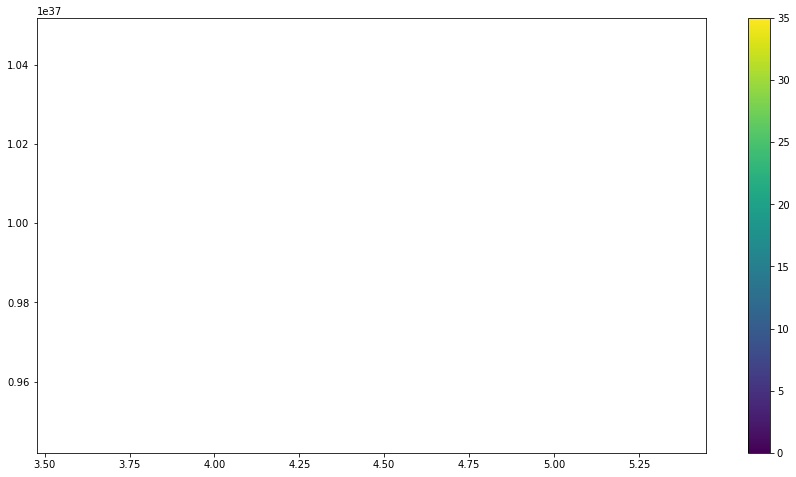

In [15]:
itime=9
iy=200
sal_prof=map.salinity[itime,:,iy,:]

plt.pcolormesh(x,z,sal_prof)
plt.colorbar()

In [ ]:
help(plt.pcolormesh)

## Zarr library

Above we're opening the dataset with Xarray. This is probably the recommended route in most cases, but you can also use the underlying zarr library directly.

In [ ]:
ff=zarr.open_consolidated(his_url) #consolidated metadata is necessary when no directories can be listed as over http 

print(ff.tree())


In [ ]:
print(ff.waterlevel.attrs.asdict())
ff.waterlevel.info

In [ ]:
x=np.array([1,2,3])
y=np.array([1,2])
vals=np.random.randn(2,3)
#plt.pcolormesh(x,y,vals)
x.shape, y.shape, vals.shape

In [ ]:
!which conda
